In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, get_scorer_names
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px

iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['Target'] = iris['target']
df_iris['target name'] = np.where(df_iris['Target'] == 0, 'setosa', np.where(df_iris['Target'] == 1, 'versicolor', 'virginica'))
X = df_iris.iloc[:,:-2]
y = df_iris['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

scoring = ['accuracy', 'roc_auc_ovo', 'f1_macro']
param_grid = {
    'n_neighbors': [x for x in range(1, 60) if x%2 == 1]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, refit_time_eval_set=[(X_test_scaler, y_test)], cv=3, scoring=scoring, refit='accuracy')
grid_search.fit(X_train_scaler, y_train)


TypeError: __init__() got an unexpected keyword argument 'refit_time_eval_set'

In [56]:
import sklearn
print(sklearn.__version__)

1.2.2


In [50]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [51]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,...,split2_test_roc_auc_ovo,mean_test_roc_auc_ovo,std_test_roc_auc_ovo,rank_test_roc_auc_ovo,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.002321,0.001231,0.011900,9.386653e-04,1,{'n_neighbors': 1},0.925,0.950,0.925,0.933333,...,0.942308,0.949359,0.007616,23,0.925517,0.948136,0.924264,0.932639,0.010970,6
1,0.000666,0.000471,0.009684,1.218631e-03,3,{'n_neighbors': 3},0.900,0.975,0.925,0.933333,...,0.994505,0.986262,0.012557,7,0.901099,0.974755,0.924264,0.933372,0.030752,4
2,0.000000,0.000000,0.009999,4.495664e-07,5,{'n_neighbors': 5},0.875,0.975,0.950,0.933333,...,0.996337,0.990576,0.008396,3,0.875862,0.974755,0.950000,0.933539,0.042017,3
3,0.000000,0.000000,0.011666,2.356909e-03,7,{'n_neighbors': 7},0.875,1.000,0.950,0.941667,...,0.998168,0.991673,0.010507,2,0.875862,1.000000,0.950000,0.941954,0.050997,2
4,0.001666,0.002357,0.009999,1.946680e-07,9,{'n_neighbors': 9},0.900,1.000,0.950,0.950000,...,0.997253,0.990442,0.011628,4,0.901099,1.000000,0.950000,0.950366,0.040377,1


In [52]:
grid_search.score(X_test_scaler, y_test)

1.0

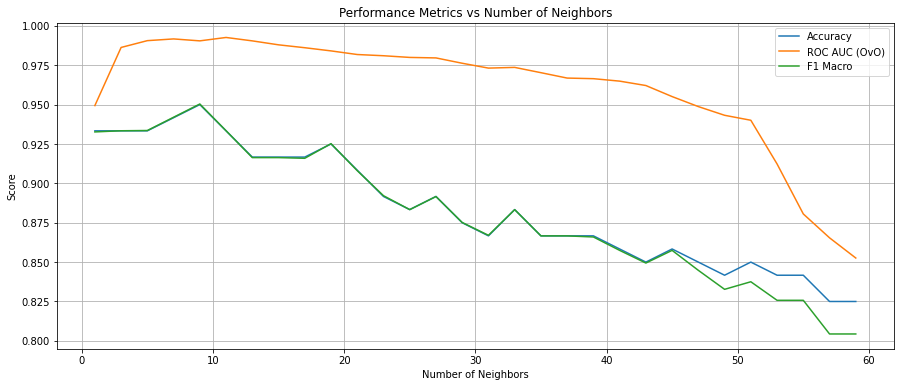

In [53]:
import matplotlib.pyplot as plt

# Створюємо пустий графік
plt.figure(figsize=(15, 6))

# Побудова графіків для кожної метрики
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_accuracy'], label='Accuracy')
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_roc_auc_ovo'], label='ROC AUC (OvO)')
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_f1_macro'], label='F1 Macro')

# Налаштування графіку
plt.title('Performance Metrics vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()  # Вивести легенду

# Показати графік
plt.grid()
plt.show()

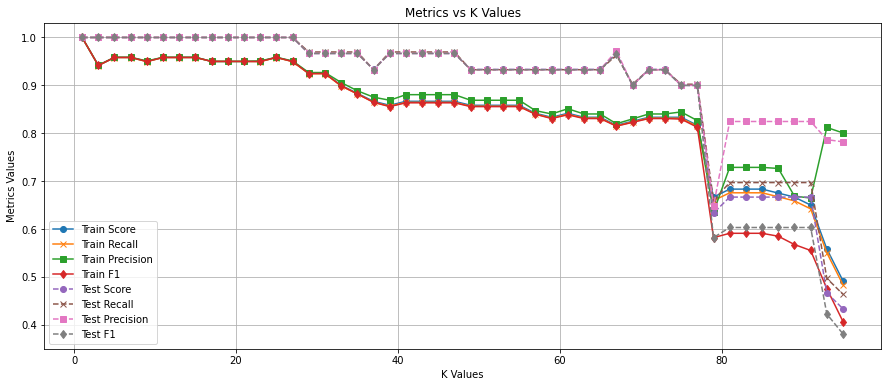

In [7]:
k_values = [point[0] for point in curve_train]
train_scores = [point[1] for point in curve_train]
train_recall = [point[2] for point in curve_train]
train_precision = [point[3] for point in curve_train]
train_f1 = [point[4] for point in curve_train]

test_scores = [point[1] for point in curve_test]
test_recall = [point[2] for point in curve_test]
test_precision = [point[3] for point in curve_test]
test_f1 = [point[4] for point in curve_test]

plt.figure(figsize=(15, 6))

plt.plot(k_values, train_scores, label='Train Score', marker='o')
plt.plot(k_values, train_recall, label='Train Recall', marker='x')
plt.plot(k_values, train_precision, label='Train Precision', marker='s')
plt.plot(k_values, train_f1, label='Train F1', marker='d')

plt.plot(k_values, test_scores, label='Test Score', linestyle='--', marker='o')
plt.plot(k_values, test_recall, label='Test Recall', linestyle='--', marker='x')
plt.plot(k_values, test_precision, label='Test Precision', linestyle='--', marker='s')
plt.plot(k_values, test_f1, label='Test F1', linestyle='--', marker='d')

plt.xlabel('K Values')
plt.ylabel('Metrics Values')
plt.title('Metrics vs K Values')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
fig = px.line(df_score, x=df_score.index, y=[
    'Train_score', 
    'Train_recall', 
    'Train_precision', 
    'Train_f1', 
    'Test_score', 
    'Test_recall', 
    'Test_precision', 
    'Test_f1'],
     title='K Values')

fig.show()

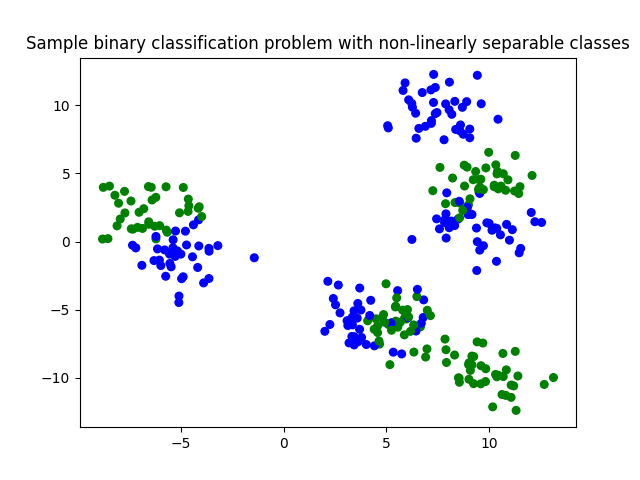

In [13]:
%matplotlib ipympl
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [8]:
pd.DataFrame(X_D2)

,0,1
0,-5.971788,-1.759139
1,3.586356,-5.613891
2,6.662805,-6.252550
3,11.445015,3.524638
4,10.693343,-9.900922
...,...,...
295,10.380193,-9.919550
296,12.095520,4.849921
297,10.252850,4.131781
298,5.176469,-9.027085


In [9]:
y_D2

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], d